<div class="alert alert-block alert-info">
    <b>Librerias</b></div>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import re
import plotly.express as px 
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
    <b>Import</b></div>

In [30]:
df_movie = pd.read_csv('C:\\Users\\ASUSPC\\IT_academy\\Tasca_M4\\PRE-PROCESSING-DATA-main\\movies.dat', sep='::', encoding='ISO-8859-1', engine='python', header=None, names=['ID', 'Movie', 'Genre'], index_col="ID" )

In [31]:
df_movie.to_excel('aver2.xlsx')

In [32]:
#Entorno de trabajo
print(os.getcwd())

C:\Users\ASUSPC\IT_academy\Tasca_M4


In [33]:
os.listdir(os.curdir)

['.ipynb_checkpoints',
 'aver.xlsx',
 'aver2.xlsx',
 'Examining-Data-main',
 'Porcentaje.png',
 'PRE-PROCESSING-DATA-main',
 'Rango.png',
 'tasca_4_2 antes de entregar.ipynb',
 'tasca_4_2_para_mi.ipynb',
 'Tasca_M4_T01.ipynb',
 'Tasca_M4_T02_1.ipynb',
 'Tasca_M4_T02_2_3.ipynb']

<div class="alert alert-block alert-info">
    <b>Examen datos</b></div>

In [34]:
df_movie.memory_usage(deep=True)

Index     31064
Movie    316510
Genre    264807
dtype: int64

In [35]:
df_movie.head()

,Movie,Genre
ID,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [36]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Movie   3883 non-null   object
 1   Genre   3883 non-null   object
dtypes: object(2)
memory usage: 91.0+ KB


In [37]:
df_movie.shape

(3883, 2)

In [38]:
df_movie.ndim

2

In [39]:
df_movie.Genre.unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

In [40]:
df_movie.Movie.unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Tigerland (2000)', 'Two Family House (2000)',
       'Contender, The (2000)'], dtype=object)

In [41]:
df_movie.notnull().sum()

Movie    3883
Genre    3883
dtype: int64

<div class="alert alert-block alert-warning">
Como no parece que hayan valores nulos, se puede proceder a manipular el dataframe</div>

In [42]:
#Creación de una nueva columna "Year" asignando int como datatype.
df_movie['Year'] = df_movie['Movie'].str.extract(r'\((\d{4})\)').astype(int)

In [43]:
#Manipulación de la columna "Movie" para eliminar las fechas ya que hemos creado una columna con las mismas.
df_movie['Movie']=df_movie['Movie'].str.replace(r'\s*\(\d{4}\)','',regex=True)

In [44]:
#Manipulación de la columna "Genre" dejando el primer genero que aparece en cada row.
df_movie['Genre']=df_movie['Genre'].str.replace(r'\s*\|.*','', regex=True)

In [45]:
#Comprobación del resultado
df_movie.head()

,Movie,Genre,Year
ID,,,
1,Toy Story,Animation,1995
2,Jumanji,Adventure,1995
3,Grumpier Old Men,Comedy,1995
4,Waiting to Exhale,Comedy,1995
5,Father of the Bride Part II,Comedy,1995


In [46]:
df_movie.dtypes

Movie    object
Genre    object
Year      int32
dtype: object

In [47]:
df_movie.isnull().sum()

Movie    0
Genre    0
Year     0
dtype: int64

In [48]:
df_movie.Genre.unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'War', 'Fantasy',
       'Musical'], dtype=object)

In [49]:
df_movie['Genre'].value_counts()

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: Genre, dtype: int64

<div class="alert alert-block alert-info">
    <b>Visualización grafica</b></div>

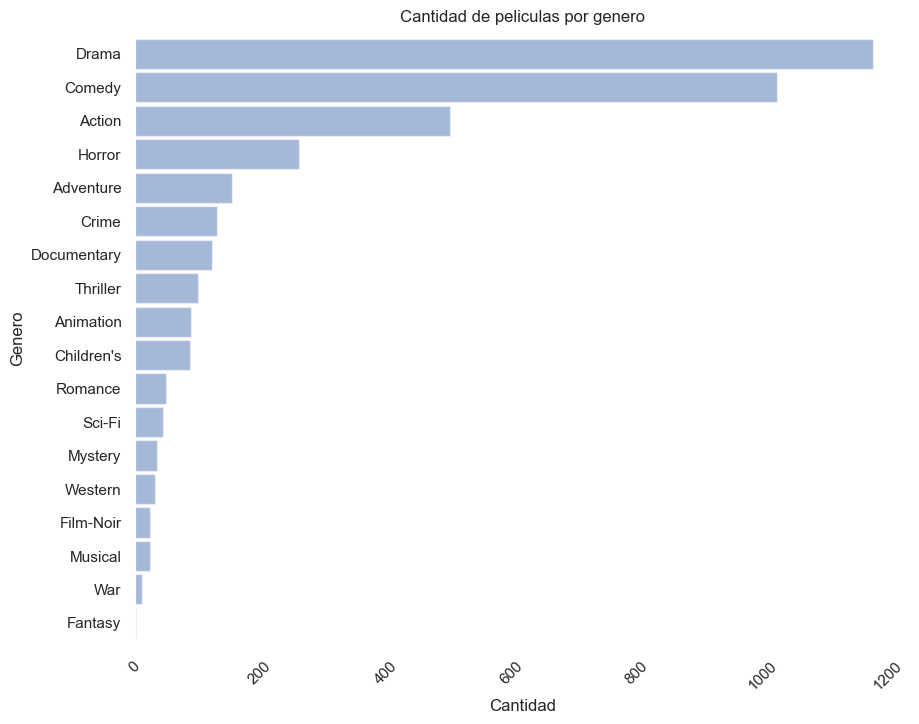

In [50]:
#Visualizamos la cantidad de peliculas por cada genero.
df_movie['Genre'].value_counts().sort_values(ascending=True).plot.barh(alpha=0.5, width = 0.9, figsize=(10,8))
plt.title("Cantidad de peliculas por genero")
plt.xlabel("Cantidad")
plt.xticks(rotation=45)
plt.ylabel("Genero")
plt.show()
plt.show()

_Al parecer el genero "drama" es el que mas demanda tiene._

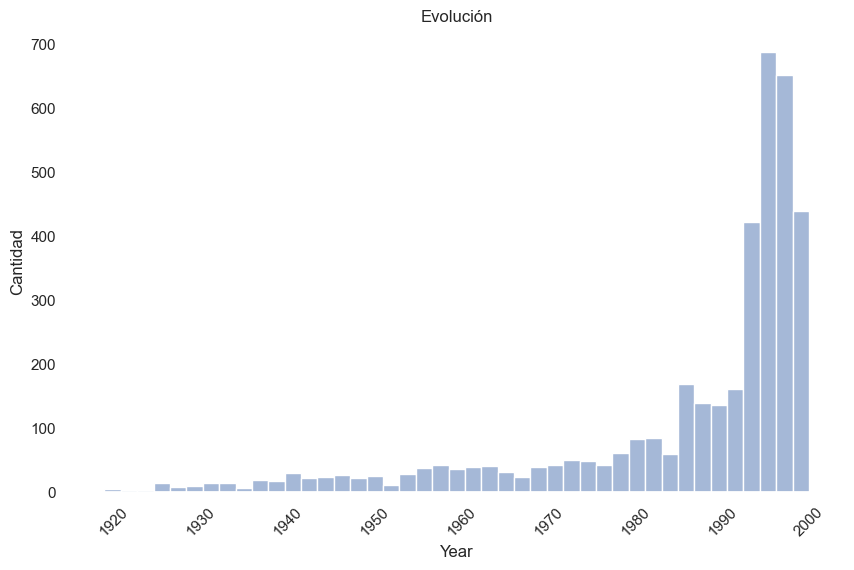

In [51]:
#Visualización general de la evolución en la produccion de peliculas.
sns.set(rc={"figure.figsize":(10, 6)})
sns.set_style(rc = {'axes.facecolor': 'white'})

plot=sns.histplot(df_movie['Year'], alpha=0.5)
plt.title("Evolución")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Cantidad")
plt.show()

_A pesar del crecimiento, parece que la evolución no haya sido siempre constante y que la misma haya alcanzado su umbral en la decada entre los 90 y el 2000._

In [52]:
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash

grouped_data = df_movie.groupby(['Year', 'Genre']).size().reset_index(name='count')

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H4('Evolución de producción de peliculas por genero'),
    dcc.Graph(id="graph"),
    dcc.Checklist(
        id="checklist",
        options=['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'War', 'Fantasy',
       'Musical'],
        value=["Comedy", "Drama"],
        inline=True
    ),
])


@app.callback(
    Output("graph", "figure"), 
    Input("checklist", "value"))
def update_line_chart(Genre):
    mask = grouped_data.Genre.isin(Genre)
    fig = px.line(grouped_data[mask], 
        x="Year", y="count", color='Genre')
    return fig


app.run_server(mode='inline', dev_tools_ui=True, #debug=True,
              dev_tools_hot_reload =True, threaded=True)

Dash is running on http://127.0.0.1:8050/



_En el grafico interactivo se pueden apreciar los mismos datos mas al detalle pudiendo evidenciar como ha evoluciónado cada genero a lo largo del tiempo._ 

<div class="alert alert-block alert-warning">
Podemos examinar las tres ultimas decadas para tener una idea aun mas detallada sobre la evolucion de los datos</div>

In [53]:
df = df_movie.groupby(['Year', 'Genre']).size().reset_index(name='count').query('Year>1980')

In [54]:
px.bar(df,x="Genre",y="count",color="Genre",animation_group="Genre",animation_frame="Year",range_y=[0,150])

_En conclusion, parece que con el paso del tiempo los gustos hayan sido volubles y que, segun los datos del periodo en examen, el drama sea lo que mas atractivo haya tenido._